# WHAT TO DOOO

BEAM: 26.02 EARLY IN THE MORNING (03.00)

1. For every isotope present in every spectra at every t$_{delay}$, we are going to caluclate the activity.

We attack this one spectra at the time, and try to figure out which isotope is present in every spectra. Once all the energies in a spectra is downloaded, it is a puzzle where one seeks to find the isotopes produced. For this one can use the [nndc chart](https://www.nndc.bnl.gov/nudat2/reZoom.jsp?newZoom=1) and the [yellow page](http://nucleardata.nuclear.lu.se/toi/radSearch.asp).

Using the nndc chart we expect initially that the chart subsection spanned by going 6 nuclei to the left and 6 nuclei down from the sample + beam can be produced. For instance, when looking at copper 61 (61Cu), we will start off from 63Zn when using a duteron beam, and 62Zn using a proton beam. Then we can use the yellow page to search for the energies. For our that the constraintes Energies +- 2, T_1/2 > 1m, Massnumber 1-67 is suitable. For all of the monitor foils except titanium one should unabigiously be able to determine the presidence of an isotope. That is, if one can find energies in the spectra that corresponds with multiple energies of an isotope located in the yellow pages, it is very highly likely that one. Titanium remains to be undiscovered. 

If we start with Cu. First, use fits-peaks to read the spectra and produce rapports. Then find suspect, and save the list of files in the directory lbl-> room 131 -> Monitor-> CU raports -> Isotopes. Then these isotope files are read, and crossmatched withthe spectra energies.  


 1. Reads a spectra
 2. Crosscheck in nncn to look at range of 6 nuclei to the left or below
 3. Look up the energies at the yellow page
 
 http://nucleardata.nuclear.lu.se/toi/radSearch.asp
 

 They match step 2, and selection is based on best fit

4. https://www-nds.iaea.org/medical/monitor_reactions.html

 4. Crossmatch
 

# 0. Imports, efficiency import 

In [1]:
import sys, os
from dateutil import parser
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


mypath_Cu                  = '/home/oline/Documents/Berkeley/lbl/room131/Monitor/Cu_rapports/Fits_repports/'

C05 = np.load('C05.npy')
C10 = np.load('C10.npy')
C15 = np.load('C15.npy')
C18 = np.load('C18.npy')
C22 = np.load('C22.npy')
C30 = np.load('C30.npy')
C40 = np.load('C40.npy')
C50 = np.load('C50.npy')
C60 = np.load('C60.npy')


# 1. Localizing the decaying product nuclei corresponding to each observed peak in the collected spectra

In [2]:
def read_Fits_Rapport(path):
    live_time, date_spec, sample, distance = [], [], [], []
    fitsE, fitsN,  fitsN_unc = [], [], []
    
    for filename in os.listdir(path):
        with open(path + filename, 'r') as infile:
            lines = infile.readlines()
            fitz_energy, fitz_peak_area, fitz_peak_area_unc = get_fitz(lines[33:])
            for j in range(len(fitz_energy)):
                fitsE.append(fitz_energy[j])
                fitsN.append(fitz_peak_area[j])
                fitsN_unc.append(fitz_peak_area_unc[j]/100)                      # Relative error 
                date_time = lines[20].split()[1] + ' '+ lines[20].split()[2]
                live_time.append(np.float(lines[21].split()[-1]))
                date_spec.append(str(parser.parse(date_time)))
                sample.append(filename[11:15])
                distance.append(filename[16:18])

    df = pd.DataFrame({'sample_ID': sample, 'distance [cm]': distance , 'fits_energy': fitsE, 'Peak_area': fitsN, 'Peak_area_unc': fitsN_unc, 'live_time [s]': live_time, 'date_time': date_spec })

    return df


def get_fitz(lines):
    """ Called in the read_files function to obtain energy and peak area
    """
    energy, peak_area, peak_area_unc = [], [], []
    
    for line in lines:
        try:
            energy.append(float(line.split()[0]))
            peak_area.append(float(line.split()[5]))
            peak_area_unc.append(float(line.split()[6]))
        except ValueError:
            pass
        except IndexError:
            pass
        
    return energy, peak_area, peak_area_unc

Cu_1 = read_Fits_Rapport(mypath_Cu)
Cu_1_50 = Cu_1[Cu_1['distance [cm]'] == '50'].reset_index()
Cu_1_10 = Cu_1[Cu_1['distance [cm]'] == '10'].reset_index()

In [3]:
def activity(Nc, decay_constant, I , efficiency, t_live):
    return Nc*decay_constant/(I*efficiency*(1-np.exp(-decay_constant*t_live)))

In [4]:
def read_Isodtope_data(path):
    Isotope_list = []
    Energy, Intensity,  Decay_mode = [], [], []
    for filename in os.listdir(path):
        print(filename)
        with open(path + filename, 'r') as infile:
            lines = infile.readlines()
            Isotope_energy, Isotope_Intensity, Isotope_decay_mode = get_Isotope(lines)
            for j in range(len(Isotope_energy)):
                Isotope_list.append(lines[0])
                Energy.append(Isotope_energy[j])
                Intensity.append(Isotope_Intensity[j])
                Decay_mode.append(Isotope_decay_mode[j])
        
            
    df = pd.DataFrame({'Isotope': Isotope_list, 'Energy': Energy, 'Isotope_Intensity': Intensity,'Decay mode': Decay_mode})        
    return df

def get_Isotope(lines):
    """ Called in the read_files function to obtain energy and peak area
    """
    energy_, Intensity_, Decay_mode_ = [], [], []
    
    for line in lines:
        try:
            energy_.append(float(line.split()[0]))
            Intensity_.append(float(line.split()[2]))
            Decay_mode_.append(line.split()[4])
        except ValueError:
            pass
        except IndexError:
            pass
    return energy_, Intensity_, Decay_mode_

In [5]:
mypath_Zn = '/home/oline/Documents/Berkeley/lbl/room131/Monitor/Cu_rapports/Isotopes/'

Isotope_crosslist = read_Isodtope_data(mypath_Zn)

# Possible Isotope List: [Zn, Cu, Ni, Co, Fe, Mn, Cr, V]

Isotope_crosslist[10:40]

Gammas from 61Cu (3.333 h 5)
Gammas from 63Zn (38.47 m 5)
Gammas from 62Zn (9.186 h 13)
Gammas from 64Cu (12.700 h 2)


,Isotope,Energy,Isotope_Intensity,Decay mode
10,Gammas from 61Cu (3.333 h 5)\n,841.211,0.2140,e+b+
11,Gammas from 61Cu (3.333 h 5)\n,1132.350,0.0900,e+b+
12,Gammas from 61Cu (3.333 h 5)\n,902.294,0.0830,e+b+
13,Gammas from 61Cu (3.333 h 5)\n,1729.473,0.0540,e+b+
14,Gammas from 61Cu (3.333 h 5)\n,1662.000,0.0530,e+b+
15,Gammas from 61Cu (3.333 h 5)\n,1064.896,0.0480,e+b+
16,Gammas from 61Cu (3.333 h 5)\n,1446.492,0.0450,e+b+
17,Gammas from 61Cu (3.333 h 5)\n,1032.162,0.0420,e+b+
18,Gammas from 61Cu (3.333 h 5)\n,2123.930,0.0410,e+b+
19,Gammas from 61Cu (3.333 h 5)\n,625.605,0.0400,e+b+


In [6]:
def read_background(filename):
    with open(filename, 'r') as infile:
        lines = infile.readlines()
        fitz_energy, fitz_peak_area, fitz_peak_area_unc = get_fitz(lines[33:])
        df = pd.DataFrame({'Energy':fitz_energy, 'Area:': fitz_peak_area})
        return df
background = read_background('Calibration_Reports/Background_spectra_rapport.txt')


In [7]:
background

,Energy,Area:
0,46.4,2259.0
1,53.3,1086.0
2,63.1,7025.0
3,72.7,60520.0
4,74.8,108325.0
5,77.0,5960.0
6,84.6,44104.0
7,87.2,15016.0
8,92.6,10331.0
9,143.7,1551.0


In [9]:
def Crossmatch_Isotope(df_iso, df_spectra):
    df_spectra['Isotope'] = np.zeros(len(df_spectra['fits_energy']))
    for i in range(len(df_iso['Energy'])):
        for j in range(len(df_spectra['fits_energy'])):
            if abs(df_iso['Energy'][i] - df_spectra['fits_energy'][j]) < 0.5:
                if df_spectra['Isotope'][j] != 0:
                    print('Fits energy located twice: ', df_spectra['fits_energy'][j])
                    a = df_iso[(df_iso['Energy'] > (df_spectra['fits_energy'][j]-0.5))  & (df_iso['Energy'] < (df_spectra['fits_energy'][j]+0.5))]
                    display(a)
                    print('Isotope previously determined as ', df_spectra['Isotope'][j])
                    print('would like to set ', df_iso['Isotope'][i][12:17] )
                    
                    b = a.loc[a['Isotope_Intensity'].idxmax()]
                    df_spectra['Isotope'][j] = b['Isotope'][12:17]
                    print('Selected ', df_spectra['Isotope'][j])
                    print('----------------------------')
                    
                    
                else:
                    df_spectra['Isotope'][j] = df_iso['Isotope'][i][12:17]
    return df_spectra

spectra_ = Crossmatch_Isotope(Isotope_crosslist.copy(), Cu_1_50.copy())

/home/oline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/oline/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
spectra_

,index,sample_ID,distance [cm],fits_energy,Peak_area,Peak_area_unc,live_time [s],date_time,Isotope
0,20,Cu-3,50,40.7,9236.0,0.038,320.0,2019-02-26 06:03:00,62Zn
1,21,Cu-3,50,67.2,724.0,0.375,320.0,2019-02-26 06:03:00,61Cu
2,22,Cu-3,50,72.7,8274.0,0.071,320.0,2019-02-26 06:03:00,0
3,23,Cu-3,50,74.9,15163.0,0.040,320.0,2019-02-26 06:03:00,0
4,24,Cu-3,50,84.7,6531.0,0.045,320.0,2019-02-26 06:03:00,0
5,25,Cu-3,50,87.3,1916.0,0.144,320.0,2019-02-26 06:03:00,0
6,26,Cu-3,50,243.7,668.0,0.375,320.0,2019-02-26 06:03:00,62Zn
7,27,Cu-3,50,394.4,440.0,0.408,320.0,2019-02-26 06:03:00,62Zn
8,28,Cu-3,50,450.5,410.0,0.414,320.0,2019-02-26 06:03:00,0
9,29,Cu-3,50,508.0,4460.0,0.072,320.0,2019-02-26 06:03:00,62Zn


In [11]:
def Crossmatch_Background(df_iso, df_spectra):
    for i in range(len(df_iso['Energy'])):
        for j in range(len(df_spectra['fits_energy'])):
            if abs(df_iso['Energy'][i] - df_spectra['fits_energy'][j]) < 0.5:
                if df_spectra['Isotope'][j] != 0:
                    print( df_spectra['fits_energy'][j])
                    display(df_iso[(df_iso['Energy'] > (df_iso['Energy'][i]-2))  & (df_iso['Energy'] < (df_iso['Energy'][i]+2))] )
                    print('Isotope previously determined as ', df_spectra['Isotope'][j],' with ',df_spectra['Isotope'][j] )
                    print('would like to set noise') 
                else:
                    df_spectra['Isotope'][j] = 'Noise'
    return df_spectra

spectra_2 = Crossmatch_Background(background.copy(),spectra_.copy())

for i in range(len(spectra_2['fits_energy'])):
    if spectra_2['fits_energy'][i] == 1347.0:
        spectra_2['Isotope'][i] = '64Cu'
    if abs(spectra_2['fits_energy'][i] - 511.5) < 0.5:
        spectra_2['Isotope'][i] = '511'

/home/oline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/oline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/oline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
def evaluate_efficiancy(B, E):
    return B[0]*np.exp(-B[1]*E**B[2])*(1-np.exp(-B[3]*E**B[4]))

In [13]:
spectra_2['efficiency'] = evaluate_efficiancy(C50, spectra_2['fits_energy'])

In [14]:
spectra_2

,index,sample_ID,distance [cm],fits_energy,Peak_area,Peak_area_unc,live_time [s],date_time,Isotope,efficiency
0,20,Cu-3,50,40.7,9236.0,0.038,320.0,2019-02-26 06:03:00,62Zn,0.000857
1,21,Cu-3,50,67.2,724.0,0.375,320.0,2019-02-26 06:03:00,61Cu,0.000925
2,22,Cu-3,50,72.7,8274.0,0.071,320.0,2019-02-26 06:03:00,Noise,0.000923
3,23,Cu-3,50,74.9,15163.0,0.040,320.0,2019-02-26 06:03:00,Noise,0.000921
4,24,Cu-3,50,84.7,6531.0,0.045,320.0,2019-02-26 06:03:00,Noise,0.000910
5,25,Cu-3,50,87.3,1916.0,0.144,320.0,2019-02-26 06:03:00,Noise,0.000906
6,26,Cu-3,50,243.7,668.0,0.375,320.0,2019-02-26 06:03:00,62Zn,0.000598
7,27,Cu-3,50,394.4,440.0,0.408,320.0,2019-02-26 06:03:00,62Zn,0.000421
8,28,Cu-3,50,450.5,410.0,0.414,320.0,2019-02-26 06:03:00,0,0.000376
9,29,Cu-3,50,508.0,4460.0,0.072,320.0,2019-02-26 06:03:00,62Zn,0.000338


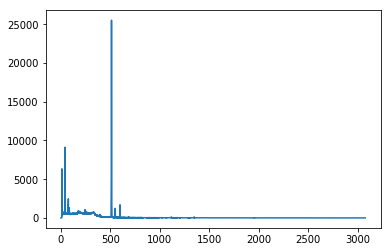

In [20]:
plt.plot(Spec_Cu_1_10cm[0], Spec_Cu_1_10cm[1])
plt.plot()